# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909
1,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
2,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
3,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
4,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863


In [8]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
2,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
3,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
4,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970


In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.282756,0.077333,0.012722,0.909889
std,0.332195,0.064251,0.026797,0.059923
min,-0.381800,0.000000,0.000000,0.754000
25%,0.025675,0.042750,0.000000,0.869000
50%,0.284100,0.068500,0.000000,0.914000
75%,0.559650,0.110000,0.000000,0.952250
max,0.831600,0.246000,0.082000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221340,0.056950,0.005950,0.937100
std,0.287580,0.055042,0.026609,0.061753
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.883500
50%,0.172000,0.067000,0.000000,0.929000
75%,0.453775,0.096500,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [14]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909,"[Elon, Musks, cryptocurrency, hype, idle, talk..."
1,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929,"[Tesla, led, Elon, Musk, confirmed, purchased,..."
2,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962,"[brief, moment, Sunday, Tesla, said, invested,..."
3,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[Twitter, Square, CEO, Jack, Dorsey, rapper, J..."
4,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863,"[Today, SEC, filing, Tesla, disclosed, acquire..."


In [15]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[Worried, GeForce, RTX, 3060, sold, cryptocurr..."
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[Reuters, Staff, FILE, PHOTO, Representation, ..."
3,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[NFTs, non-fungible, token, —, scarce, digital..."
4,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, Christie, auction, digital, artwork, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('1.5', 'billion'), 4),
 (('billion', 'bitcoin'), 3),
 (('Elon', 'Musks'), 2),
 (('Jack', 'Dorsey'), 2),
 (('Jay', 'Z'), 2),
 (('popular', 'cryptocurrency'), 2),
 (('char', 'Bitcoin'), 2),
 (('Feb.', '9'), 2),
 (('9', '2021'), 2),
 (('2021', '8:01'), 2),
 (('8:01', 'a.m'), 2),
 (('a.m', 'ET'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('all-time', 'high'), 2),
 (('Daily', 'Crunch'), 2),
 (('Crunch', 'February'), 2),
 (('Investment', 'Giveaway'), 2),
 (('Musks', 'cryptocurrency'), 1),
 (('cryptocurrency', 'hype'), 1),
 (('hype', 'idle'), 1)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('record', 'high'), 6),
 (('FILE', 'PHOTO'), 4),
 (('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('char', 'NEW'), 4),
 (('NEW', 'YORK'), 4),
 (('PHOTO', 'Representation'), 3),
 (('Representation', 'Ethereum'), 3),
 (('Ethereum', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'standing'), 3),
 (('standing', 'PC'), 3),
 (('PC', 'motherboard'), 3),
 (('motherboard', 'seen'), 3),
 (('seen', 'illustration'), 3),
 (('illustration', 'picture'), 3),
 (('picture', 'February'), 3),
 (('February', '3'), 3),
 (('3', '2018'), 3),
 (('2018', 'REUTERS/Dado'), 3)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('cryptocurrency', 8),
 ('bitcoin', 8),
 ('Bitcoin', 7),
 ('Tesla', 6),
 ('1.5', 4),
 ('billion', 4),
 ('company', 4),
 ('2021', 4),
 ('Elon', 3)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Reuters', 13),
 ('Ethereum', 12),
 ('cryptocurrency', 7),
 ('week', 7),
 ('high', 7),
 ('record', 6),
 ('February', 5),
 ('hit', 5),
 ('FILE', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

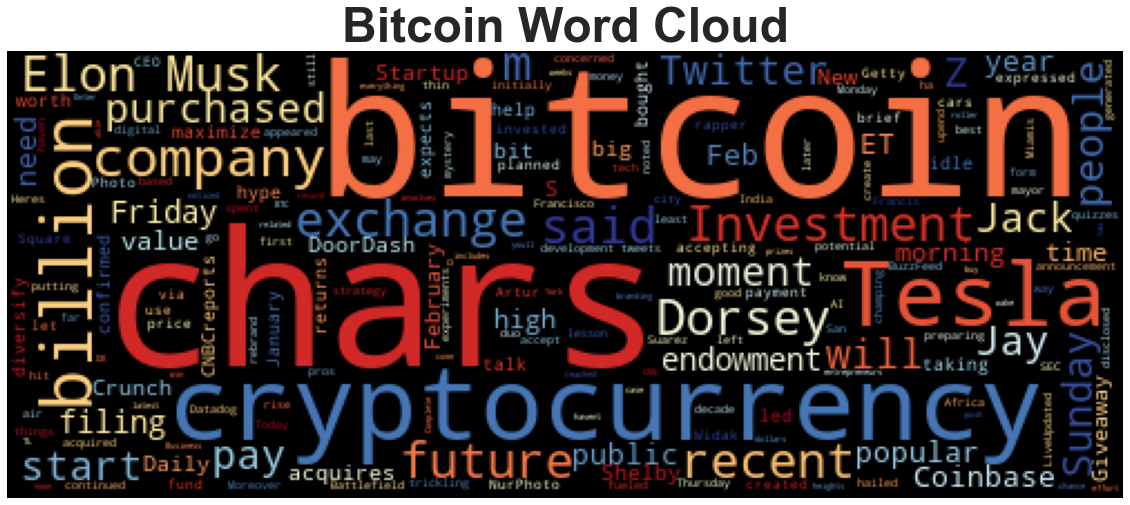

In [24]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

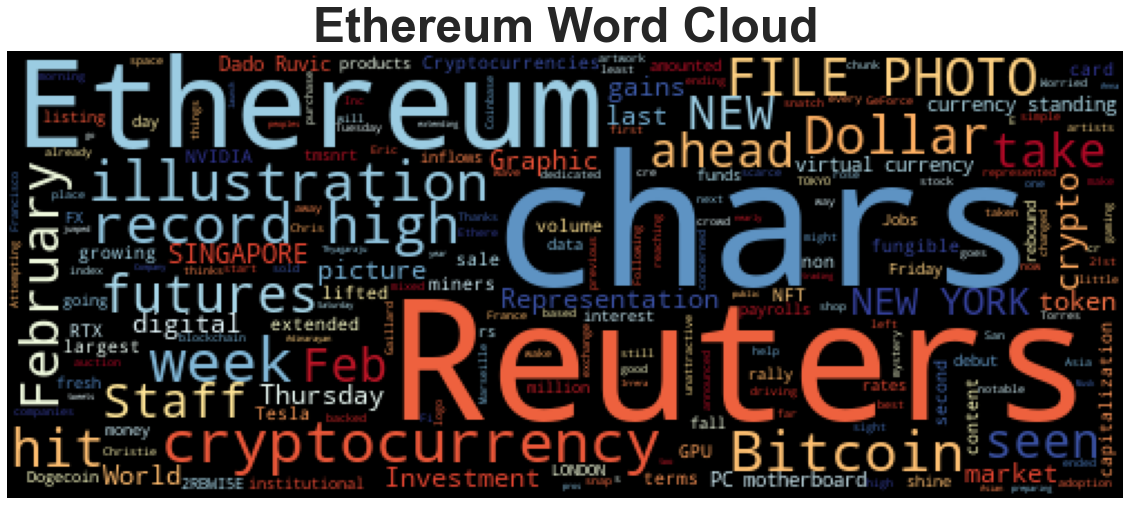

In [25]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

"Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars]For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars]Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars]Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the company no

In [30]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
chars]Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
Bitcoin PERSON
first ORDINAL
more than a decade later DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Francis Suarez PERSON
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Alabamas PERSON
Richard Shelby PERSON
next year DATE
Shelby PERSON
86 DATE
seventh ORDINAL
chars]Blockchain.com ORG
$120 mil

---

### Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars]By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
